## 1. Load the required libraries and read the dataset. (1)

In [861]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features (2)

In [863]:

df = pd.read_csv('renttherunway.csv')

df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [864]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [865]:
df.shape

(192544, 16)

In [866]:
#Copying the dataframe into new dataframe
df1 = df.copy()
df1.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


## 3. Check if there are any duplicate records in the dataset? If any, drop them.(1)

In [868]:
df1.duplicated().sum()

0

## 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) (1)

In [870]:
df1.drop(columns = ['Unnamed: 0','user_id','item_id','review_text','review_summary','review_date'], inplace = True, axis = 1)
df1.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


## 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (2)

In [872]:
df1['weight'] = df1['weight'].str.removesuffix('lbs')
df1['weight']

0         137
1         132
2         NaN
3         135
4         145
         ... 
192539    140
192540    100
192541    135
192542    165
192543    155
Name: weight, Length: 192544, dtype: object

In [873]:
#Converting the weight feature from Object to float
df1['weight'] = df1['weight'].astype('float')
df1['weight'].dtype

dtype('float64')

In [874]:

df1['weight'].isnull().sum()

29982

In [875]:
#Imputing the missing value with mean value of the feature
df1['weight']  = df1['weight'].fillna(df1['weight'].mean())
df1['weight'].head()

0    137.000000
1    132.000000
2    137.391709
3    135.000000
4    145.000000
Name: weight, dtype: float64

In [876]:
#Checking the count of the missing values in the feature
df1['weight'].isnull().sum()

0

## 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. (2)

In [878]:
df1['rented for'].value_counts()

rented for
wedding            57784
formal affair      40408
party              35626
everyday           16822
other              15388
work               15042
date                7388
vacation            4075
party: cocktail        1
Name: count, dtype: int64

In [879]:
#Checking the sum of null / empty values
df1['rented for'].isnull().sum()

10

In [880]:
#Imputing the Missing values with the mode
df1['rented for'] = df1['rented for'].fillna(df1['rented for'].mode()[0])
df1['rented for']

0              vacation
1                 other
2                 party
3         formal affair
4               wedding
              ...      
192539             work
192540             work
192541         everyday
192542          wedding
192543          wedding
Name: rented for, Length: 192544, dtype: object

In [881]:
df1['rented for'].isnull().sum()

0

In [882]:
#Locating the row to be converted to the group party from party: cocktail
df1.loc[df1['rented for'] == 'party: cocktail']

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
100942,fit,34b,114.0,8.0,party: cocktail,petite,dress,"5' 2""",12,35.0


In [883]:
#Removing the suffix from the category party: cocktail
df1['rented for'] = df1['rented for'].str.removesuffix(": cocktail")

In [884]:
#Checking the counts of unique values in a columns / feature
df1['rented for'].value_counts()

rented for
wedding          57794
formal affair    40408
party            35627
everyday         16822
other            15388
work             15042
date              7388
vacation          4075
Name: count, dtype: int64

## 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. (3)

In [886]:
df1['height'].isnull().sum()

677

In [887]:
#Removing Suffix (")
df1['height'] = df1['height'].str.removesuffix('"')
df1['height']

0         5' 8
1         5' 6
2         5' 4
3         5' 5
4         5' 9
          ... 
192539    5' 9
192540    5' 1
192541    5' 8
192542    5' 6
192543    5' 6
Name: height, Length: 192544, dtype: object

In [888]:
#Replacing the ( ' ) with ( . )
df1['height'] = df1['height'].str.replace('\' ','.')
df1['height']

0         5.8
1         5.6
2         5.4
3         5.5
4         5.9
         ... 
192539    5.9
192540    5.1
192541    5.8
192542    5.6
192543    5.6
Name: height, Length: 192544, dtype: object

In [889]:
#Converting the datatype from object to integer datatype
df1['height'] = df1['height'].astype('float32')
df1['height'].dtype

dtype('float32')

## 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. (3)

In [891]:
len(df)

192544

In [892]:
#Checking the percentage of missing values of each column
df1.isna().sum() / len(df1) * 100

fit           0.000000
bust size     9.561970
weight        0.000000
rating        0.042588
rented for    0.000000
body type     7.601899
category      0.000000
height        0.351608
size          0.000000
age           0.498587
dtype: float64

In [893]:
#sum of missing values of each column
df1.isna().sum()

fit               0
bust size     18411
weight            0
rating           82
rented for        0
body type     14637
category          0
height          677
size              0
age             960
dtype: int64

In [894]:
df1['bust size'].value_counts()

bust size
34b    27285
34c    23139
34d    18029
36c    13516
32d    11196
       ...  
28h        1
46f        1
42j        1
28i        1
44h        1
Name: count, Length: 106, dtype: int64

In [895]:
#filling missing values of bust size with top 3 mode values of the feature

df1['bust size'] = df1['bust size'].fillna('34b', limit=8137)
df1['bust size'] = df1['bust size'].fillna('34c', limit=6137)
df1['bust size'] = df1['bust size'].fillna('34d', limit=4137)

In [896]:
df1['bust size'].value_counts().head(15)

bust size
34b     35422
34c     29276
34d     22166
36c     13516
32d     11196
36d     11122
32b     10911
32c      9943
36b      9676
34a      7891
32a      5094
38d      4259
38c      2669
34dd     2665
36a      2087
Name: count, dtype: int64

In [897]:
#Filling missing rating with mode of rating column
df1['rating'] = df1['rating'].fillna(df1['rating'].mode()[0])
df1.isna().sum()

fit               0
bust size         0
weight            0
rating            0
rented for        0
body type     14637
category          0
height          677
size              0
age             960
dtype: int64

In [898]:
#Operation of filling the missing values on body type column

In [899]:
df1['body type'] = df1['body type'].fillna('hourglass', limit=4000)
df1['body type'] = df1['body type'].fillna('athletic', limit=4000)
df1['body type'] = df1['body type'].fillna('pear',limit=4000)
df1['body type'] = df1['body type'].fillna('petite')

In [900]:
df1['body type'].value_counts()

body type
hourglass            59349
athletic             47667
pear                 26135
petite               24768
full bust            15006
straight & narrow    14742
apple                 4877
Name: count, dtype: int64

In [901]:
#Filling missing values of height which is close to the mean
df1['height'] = df1['height'].fillna(5.5)

In [902]:
df1['height'].isna().sum()

0

In [903]:
#filling missing values of age according to mean
df1['age'] = df1['age'].fillna(33, limit = 480 )
df1['age'] = df1['age'].fillna(34, limit = 480 )

In [904]:
df1['age'].isna().sum()

0

In [905]:
df1.isna().sum()

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

## 9. Check the statistical summary for the numerical and categorical columns and write your findings. (3)

In [907]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,192544.0,137.391709,20.122771,50.0,125.0,137.391709,145.0,300.0
rating,192544.0,9.092758,1.429862,2.0,8.0,10.000000,10.0,10.0
height,192544.0,5.475196,0.267472,4.1,5.3,5.500000,5.7,6.6
size,192544.0,12.245175,8.494877,0.0,8.0,12.000000,16.0,58.0
age,192544.0,33.869168,8.038089,0.0,29.0,32.000000,37.0,117.0


In [908]:
df1.describe(include='O').T

,count,unique,top,freq
fit,192544,3,fit,142058
bust size,192544,106,34b,35422
rented for,192544,8,wedding,57794
body type,192544,7,hourglass,59349
category,192544,68,dress,92884


## 10. Are there outliers present in the column age? If yes, treat them with the appropriate method. (3)

<Axes: >

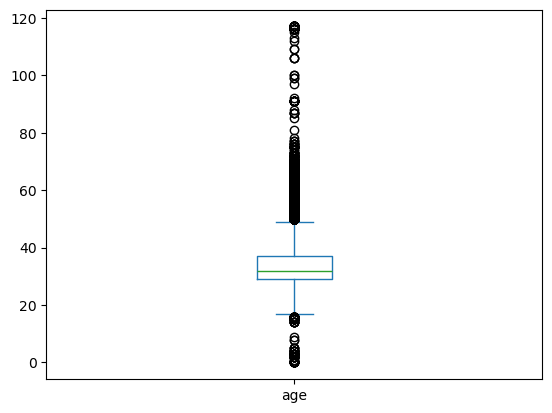

In [910]:
df1['age'].plot(kind='box')

<Axes: xlabel='age', ylabel='Density'>

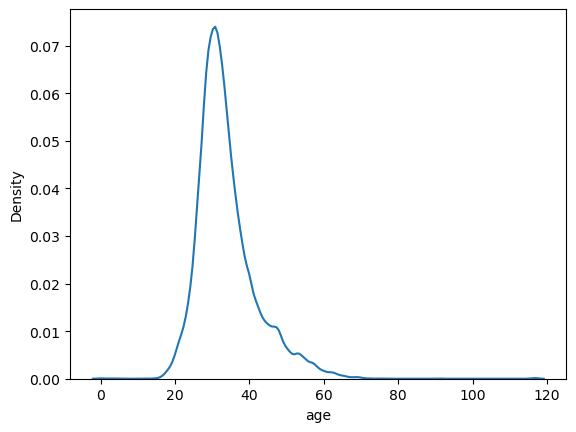

In [911]:
sns.kdeplot(df1['age'])

In [912]:
Q1 = df1['age'].quantile(0.25)
Q3 = df1['age'].quantile(0.75)

IQR = Q3 - Q1

lower_whisker = Q1 - (1.5 * IQR)
upper_whisker = Q3 + (1.5 * IQR)

print('IQR',IQR)
print('Lower',lower_whisker)
print('Upper',upper_whisker)



IQR 8.0
Lower 17.0
Upper 49.0


In [913]:
dfnew = df1.loc[(df1['age']>lower_whisker) & (df1['age'] < upper_whisker)]
dfnew['age']

0         28.0
1         36.0
3         34.0
4         27.0
5         45.0
          ... 
192539    42.0
192540    29.0
192541    31.0
192542    31.0
192543    30.0
Name: age, Length: 180708, dtype: float64

<Axes: >

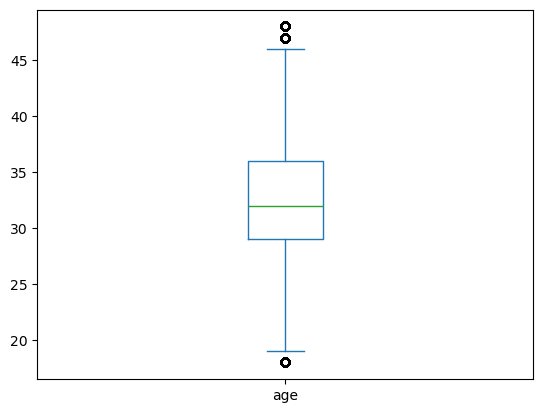

In [914]:
dfnew['age'].plot(kind='box')

In [915]:
df1.shape

(192544, 10)

<Axes: xlabel='age', ylabel='Density'>

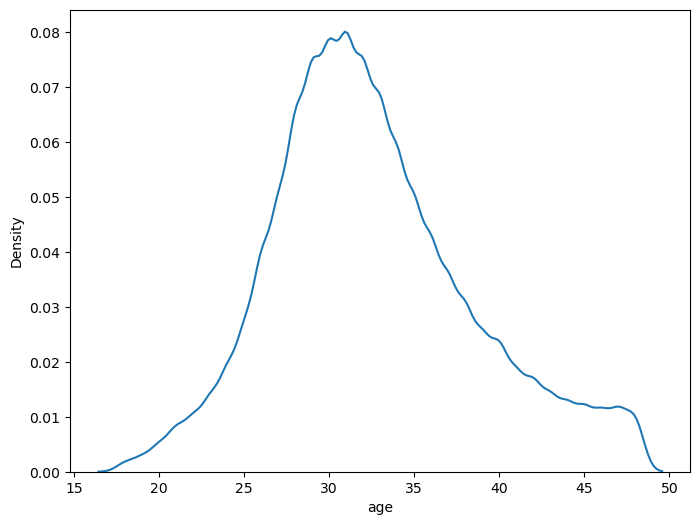

In [916]:
plt.figure(figsize=(8,6))
sns.kdeplot(dfnew['age'])

## 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot. (2)

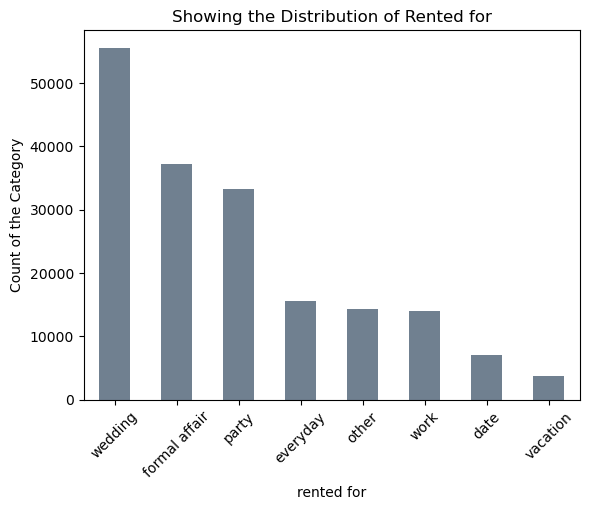

In [918]:
dfnew['rented for'].value_counts().plot(kind='bar',color='slategray')
plt.xticks(rotation =45)

plt.ylabel('Count of the Category')
plt.title("Showing the Distribution of Rented for")
plt.show()

## 12. Encode the categorical variables in the dataset. (1)

In [920]:
df1.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.000000,10.0,vacation,hourglass,romper,5.8,14,28.0
1,fit,34b,132.000000,10.0,other,straight & narrow,gown,5.6,12,36.0
2,fit,34b,137.391709,10.0,party,hourglass,sheath,5.4,4,116.0
3,fit,34c,135.000000,8.0,formal affair,pear,dress,5.5,8,34.0
4,fit,34b,145.000000,10.0,wedding,athletic,gown,5.9,12,27.0


In [921]:
#Encoding the categorical variables by LabelEncoder
df1[['fit','bust size','rented for','body type','category']]= df1[['fit','bust size','rented for',
                                                                   'body type','category']].apply(LabelEncoder().fit_transform)
df1.head(10)


,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.000000,10.0,5,3,44,5.8,14,28.0
1,0,37,132.000000,10.0,3,6,20,5.6,12,36.0
2,0,37,137.391709,10.0,4,3,45,5.4,4,116.0
3,0,38,135.000000,8.0,2,4,16,5.5,8,34.0
4,0,37,145.000000,10.0,6,1,20,5.9,12,27.0
5,0,24,138.000000,8.0,0,1,16,5.8,8,45.0
6,0,38,112.000000,10.0,1,3,16,5.3,4,27.0
7,0,40,118.000000,10.0,2,2,16,5.3,8,65.0
8,0,52,137.391709,10.0,2,2,20,5.6,21,27.0
9,0,24,114.000000,10.0,2,5,20,5.3,1,33.0


## 13. Standardize the data, so that the values are within a particular range. (1)

In [923]:
sc = StandardScaler()

In [924]:
scaled_Data =  sc.fit_transform(df1)
print(scaled_Data.ndim)

dfnew = pd.DataFrame(scaled_Data, columns= df1.columns)
dfnew


2


,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.556291,-0.011482,-1.946601e-02,0.634498,0.514420,0.016235,1.569310,1.214641,0.206575,-0.730171
1,-0.556291,-0.194200,-2.679414e-01,0.634498,-0.456753,1.864422,-0.307247,0.466718,-0.028862,0.265093
2,-0.556291,-0.194200,-1.412419e-15,0.634498,0.028833,0.016235,1.647500,-0.281204,-0.970608,10.217732
3,-0.556291,-0.102841,-1.188562e-01,-0.764242,-0.942340,0.632297,-0.620006,0.092757,-0.499735,0.016277
4,-0.556291,-0.194200,3.780946e-01,0.634498,1.000007,-1.215890,-0.307247,1.588602,-0.028862,-0.854579
...,...,...,...,...,...,...,...,...,...,...
192539,-0.556291,0.171237,1.296192e-01,0.634498,1.485593,0.016235,0.161892,1.588602,-0.499735,1.011541
192540,-0.556291,-1.290513,-1.858184e+00,0.634498,1.485593,1.248360,-0.620006,-1.403089,-0.970608,-0.605763
192541,-0.556291,0.810753,-1.188562e-01,-2.162982,-1.427926,1.864422,-0.620006,1.214641,-0.499735,-0.356947
192542,-0.556291,1.084831,1.371996e+00,0.634498,1.000007,0.632297,-0.620006,0.466718,0.442012,-0.356947
